#  推断统计

## 三, 推断统计

推断统计, 通过样本推断总体的统计方法, 包括对总体的未知参数进行估计; 对关于参数的假设进行检查; 对总体进行预测预报等.
推断统计的基本问题可以分为两大类：一类是 **参数估计** 问题; 另一类是 **假设检验** 问题

### 1, 总体, 个体与样本

总体, 要研究对象的所有数据, 获取通常比较困难. 总体中的某个数据, 就是个体. 从总体中抽取部分个体, 就构成了样本, 样本中的个体数, 称为样本容量.

### 2, 参数估计

参数估计, 用样本指标(统计量)估计总体指标(参数). 参数估计有 **点估计** 和 **区间估计** 两种

#### 2.01, 点估计

点估计是依据样本统计量估计总体中的未知参数. 通常它们是总体的某个特征值，如数学期望, 方差和相关系数等.
点估计问题就是要构造一个只依赖于样本的量，作为总体未知参数的估计值.

#### 2.02, 区间估计

区间估计是根据样本的统计量, 计算出一个可能的区间(置信区间) 和 概率(置信度), 表示总体的未知参数有多少概率位于该区间.

**注意:**  
点估计使用一个值来作为总体参数值, 能给出具体值, 但易受随机抽样影响, 准确性不够  
区间估计使用一个置信区间和置信度, 表示总体参数值有多少可能(置信度)会在该范围(置信区间)内, 能给出合理的范围和信心指数, 不能给出具体值

#### 2.03, 中心极限定理

要确定置信区间与置信度, 我们先要知道总体与样本之间, 在分布上有着怎样的联系. 中心极限定理(独立同分布的中心极限定理)给出了它们之间的联系:

如果总体均值为 $\mu$, 方差为 $\sigma^{2}$, 我们进行随机抽样, 样本容量为 n, 当 n 增大时，则样本均值 $\bar{X}$
逐渐趋近服从均值为 $\mu$, 方差为 $\sigma^{2} / n$ 的正态分布：

$$\bar{X} \sim N\left(\mu, \sigma^{2} / n\right)$$

**说明:**  
进行多次抽样，每次抽样会得到一个均值, 这些均值会围绕在总体均值左右，呈正态分布  
当样本容量 n 足够大时, 抽样样本均值的均值 ≈ 样本均值 $\bar{X}$ ≈ 总体均值 $\mu$, 样本均值分布的标准差等于 $\sigma /
\sqrt{n}$  
样本均值分布的标准差, 称为标准误差, 简称标准误

模拟证明:

总体均值: 18.270423532980452 总体标准差: 3.8201265113791596
样本均值:
18.194948520041606
样本均值的均值:
18.26385715935595
标准误差:
0.373202226318143
偏度:
0.00746666188264042


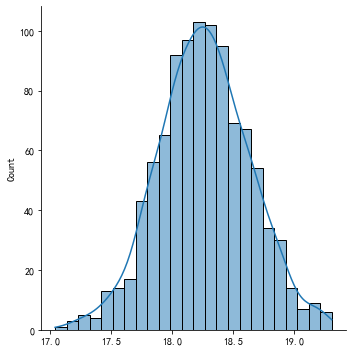

In [56]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.rcParams['font.family'] = 'SimHei'  
plt.rcParams['axes.unicode_minus'] = False  

# 定义非正态分布总体(也可以是正态分布)  
data = np.random.normal(20, 5, size=10000)  
data.sort()  
all_ = np.random.choice(data[0:8000], size=10000)  
# sns.displot(all_)  

# 将总体的均值和标准差设为已知条件  
print('总体均值:', all_.mean(), '总体标准差:', all_.std())  

# 创建存放每次抽样的平均值的数组(初始值为 0)  
mean_arr = np.zeros(1000)  

# 循环抽取 1000 个样本, 每次抽 100 个  
for i in range(len(mean_arr)):  
    mean_arr[i] = np.random.choice(all_, size=100, replace=False).mean()  

# 验证结果  
print('样本均值:', mean_arr[1], '样本均值的均值:', mean_arr.mean(),   
      '标准误差:', mean_arr.std(), '偏度:', pd.Series(mean_arr).skew(), sep='\n')  

sns.displot(mean_arr, kde=True)  
plt.show() 

#### 2.04, 正态分布的特性

正态分布: $X \sim N\left(\mu, \sigma^{2}\right)$

![png](/images/mathematical-statistics/zttx.png)

以均值为中心:  
在 1 倍标准差内包含约 68.2% 的样本数据  
在 2 倍标准差内包含约 95.4% 的样本数据  
在 3 倍标准差内包含约 99.7% 的样本数据

证明:

In [4]:
# 定义标准差  
scale = 10  

# 定义数据  
x = np.random.normal(0, scale, size=100000)  

# 计算  
for times in range(1, 4):  
    y = x[(x > -times * scale) & (x < times * scale)]  
    print(f'{times}倍的标准差:')  
    print(f'{len(y) * 100 / len(x)}%')  

1倍的标准差:
68.206%
2倍的标准差:
95.354%
3倍的标准差:
99.711%


#### 2.05, 重要结论

根据中心极限定理和正态分布的特性, 如果总体标准差为$\sigma$, 对总体进行一次抽样, 如果样本足够大, 则样品均值 $\bar{X}$
服从正态分布, 该均值约有 95.4% 的概率会在 2 倍的标准误差 ($\mu - 2\sigma / \sqrt{n}, \mu + 2\sigma /
\sqrt{n}$) 范围内, 并且该样本均值约等于总体均值 $\mu$. 从而, 可以利用这一结论, 对总体均值进行区间估计.

**结论验证:**

样本均值: 9695.658932218576
置信区间(95%置信度): (9685.858932218576, 9705.458932218575)
总体均值有 95% 的概率在(9685.858932218576, 9705.458932218575)区间内
总体均值: 9696


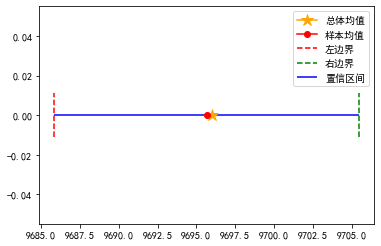

In [5]:
# 随机生成总体均值, 其值未知  
mean = np.random.randint(0, 10000)  

# 总体的标准差已知为 50  
std = 50  

# 定义总体数据  
all_ = np.random.normal(mean, std, size=100000)  

# 从总体抽取 100 个元素构成样本  
sample = np.random.choice(all_, size=100, replace=False)  

# 计算样本均值  
sample_mean = sample.mean()  
print('样本均值:', sample_mean)  

# 计算样本的标准误差  
se = std / np.sqrt(n)  

# 计算置信区间 95%置信度  
min_ = sample_mean - 1.96 * se  
max_ = sample_mean + 1.96 * se  
print('置信区间(95%置信度):', (min_, max_))  

# 区间估计  
print(f'总体均值有 95% 的概率在{(min_, max_)}区间内')  
print('总体均值:', mean)  

# 绘图辅助  
plt.plot(mean, 0, marker='*', color='orange', ms=12, label='总体均值')  
plt.plot(sample_mean, 0, marker='o', color='r', label='样本均值')  
plt.hlines(0, xmin=min_, xmax=max_, color='b', label='置信区间')  
plt.axvline(min_, 0.4, 0.6, color='r', ls='--', label='左边界')  
plt.axvline(max_, 0.4, 0.6, color='g', ls='--', label='右边界')  
plt.legend()  
plt.show()  

### 3, 假设检验

假设检验(显著性检验), 先对总体做出假设, 然后通过判断样本与总体之间是否存在显著性差异, 来验证总体的假设

假设检验使用了一种类似于 “反证法” 的推理方法，它的特点是：

* 先对总体做出两个完全相反的假设, 原假设(设为真) 和 备择假设, 计算后导致不合理现象产生，则拒绝原假设, 接受备择假设, 反之接受原假设, 放弃备择假设

* 这种 “反证法” 不同于一般的反证法. 所谓不合理现象产生，并非指形式逻辑上的绝对矛盾，而是基于小概率原理：概率很小的事件在一次试验中几乎是不可能发生的，若发生了，就是不合理的. 

* 怎样才算 “小概率”, 通常可将概率不超过 0.05 的事件称为 “小概率事件” ，也可视具体情形而取 0.1 或 0.01 等. 在假设检验中常记这个概率为 α，称为显著性水平

假设检验可分为正态分布检验, 正态总体均值检验, 非参数检验三类, 本文只介绍 **正态总体均值检验** , 包括 Z检验 和 t检验 两种情况

#### 3.01, 关键概念:

对总体参数做出两个完全对立的假设, 分别为:  
**原假设(零假设) $H_{0}$  
备择假设(对立假设) $H_{1}$**

**双边假设检验** :  
$H_{0}: \mu=\mu_{0}, H_{1}: \mu \neq \mu_{0}$

**单边假设检验** :  
$H_{0}: \mu \geq \mu_{0}, H_{1}: \mu<\mu_{0}$ (**左边检验**)  
$H_{0}: \mu \leq \mu_{0}, H_{1}: \mu>\mu_{0}$ ( **右边检验** )  
$\mu$ 为总体均值, $\mu_{0}$ 为假设均值

**显著性水平** : 根据需要设定的小概率事件的概率 α (1 - α 为置信度)

**检验统计量** (Z 和 t): 用来判断样本均值与总体均值是否存在显著性差异

**P值:** 通过检验统计量计算而得的概率值, 表示原假设可被拒绝的最小值(或可支持原假设的概率):  
P ≤ α, 原假设可被拒绝的最小值比显著性水平还低, 原假设可被拒绝, 则拒绝原假设  
P > α, 原假设可被拒绝的最小值大于显著性水平, 原假设不可被拒绝, 支持原假设

#### 3.02, 假设检验的步骤

设置原假设与备择假设  
设置显著性水平 α  
根据问题选择假设检验的方式  
计算统计量(Z 或 t)  
计算 P值(Z 或 t 围成的分布面积)  
根据 P值 与 α值, 决定接受原假设还是备择假设

例, 某车间用一台包装机包装葡萄糖. 袋装糖的净重是一个随机变量，它服从正态分布. 当机器正常时，其均值为 0.5kg，标准差为 0.015kg.
某日开工后为检验包装机是否正常，随机地抽取它所包装的糖 9 袋，称得净重为(kg):  
0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512  
判断下面说法是否正确:  
(1) 机器正常

例, 某车间用包装机包装葡萄糖. 袋装糖的净重是一个随机变量，它服从正态分布. 随机地抽取糖 9 袋，称得净重为(kg):  
0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512  
判断下面说法是否正确:  
(2) 该车间袋装糖净重均值为 0.5kg  
(3) 该车间袋装糖净重均值不少于 0.5kg  
(4) 该车间袋装糖净重均值不多于 0.5kg

#### 3.03, Z检验

Z检验适用于: 总体正态分布且方差已知, 样本容量较大(一般 ≥ 30)

Z统计量计算公式:

$$Z=\frac{\bar{x}-\mu_{0}}{S_{\bar{x}}}=\frac{\bar{x}-\mu_{0}}{\sigma /
\sqrt{n}}$$

$\bar{x}$: 样本均值  
$\mu_{0}$: 假设的总体均值  
$S_{\bar{x}}$: 样本的标准误差  
$\sigma$: 总体的标准差  
$n$: 样本容量

检验说法(1): 机器正常

双边检验:  
原假设机器正常: $H_{0}: \mu=\mu_{0}=0.5kg$  
备择假设机器不正常: $H_{1}: \mu \neq \mu_{0} \neq 0.5kg$  
设置显著性水平: α = 0.05

In [50]:
import numpy as np  
from scipy import stats  

# 样本已知  
a = np.array([0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])  

# 总体均值和标准差已知  
mean, std = 0.5, 0.015  

# 计算样本均值  
sample_mean = a.mean()  

# 计算样本标准误差  
se = std / np.sqrt(len(a))  

# 计算 Z统计量  
Z = (sample_mean - mean) / se  
print('Z统计量:', Z)  

# 计算 P值, 双边检验: Z值与其右边曲线围成的面积的 2 倍  
P = 2 * stats.norm.sf(abs(Z))  

print('P值:' , P)  

Z统计量: 2.244444444444471
P值: 0.02480381963225589


![]()

由结果可知, Z值 超过了 1.96, 由 Z值 与其右边曲线围成的面积的 2 倍, 必然小于 α(1.96 与其右边曲线围成的面积的 2 倍), 计算结果 P < α, 因此拒绝原假设, 接受备择假设, 机器不正常

#### 3.04, t检验

t检验适用于: 总体正态分布, 方差未知, 样本数量较少(一般 < 30), 但是随着样本容量的增加, 分布逐渐趋于正态分布

![](/images/mathematical-statistics/tzyd.png)

t统计量计算公式:

$$t=\frac{\bar{x}-\mu_{0}}{S_{\bar{x}}}=\frac{\bar{x}-\mu_{0}}{S / \sqrt{n}}$$

$\bar{x}$: 样本均值  
$\mu_{0}$: 假设的总体均值  
$S_{\bar{x}}$: 样本的标准误差  
$S$: 样本的标准差  
$n$: 样本容量

**双边检验** :  
检验说法(2): 该车间袋装糖净重均值为 0.5kg

原假设, 该车间袋装糖净重均值为 0.5kg: $H_{0}: \mu=\mu_{0}=0.5kg$  
备择假设, 该车间袋装糖净重均值不为 0.5kg: $H_{1}: \mu \neq \mu_{0} \neq 0.5kg$  
设置显著性水平: α = 0.05

In [51]:
# 样本已知  
a = np.array([0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])  

# 假设的总体均值已知  
mean = 0.5  

# 计算样本均值  
sample_mean = a.mean()  

# 计算样本标准差  
std = a.std()  

# 计算 t统计量  
t = (sample_mean - mean) / ( std / np.sqrt(len(a)))  
print('t统计量:', t)  

# 计算 P值, df 是自由度: 样本变量可自由取值的个数  
P = 2 * stats.t.sf(abs(t), df=len(a) - 1)  
print('P值:', P)  

t统计量: 3.802382179137283
P值: 0.005218925008708613


P < α, 拒绝原假设, 接受备择假设: 该车间袋装糖净重均值不为 0.5kg

还可以通过 scipy 提供的方法 `ttest_1samp` 来进行 t检验计算:

In [52]:
from scipy import stats
stats.ttest_1samp(a, 0.5)  

Ttest_1sampResult(statistic=3.584920298041139, pvalue=0.007137006417828698)

**左边检验** :  
检验说法(3): 该车间袋装糖净重均值不少于 0.5kg

原假设, 该车间袋装糖净重均值不少于 0.5kg: $H_{0}: \mu \geq \mu_{0}$  
备择假设, 该车间袋装糖净重均值少于 0.5kg: $H_{1}: \mu<\mu_{0}$  
设置显著性水平: α = 0.05

In [53]:
# t统计量上述已经计算, 只需计算 P值: t统计量与其左边曲线围成的面积  
P = stats.t.cdf(t, df=len(a) - 1)  
print('P值:', P)  

P值: 0.9973905374956458


P > α, 接受原假设, 该车间袋装糖净重均值不少于 0.5kg

**右边检验** :  
检验说法(4): 该车间袋装糖净重均值不多于 0.5kg

原假设, 该车间袋装糖净重均值不多于 0.5kg: $H_{0}: \mu \leq \mu_{0}$  
备择假设, 该车间袋装糖净重均值多于 0.5kg: $H_{1}: \mu>\mu_{0}$  
设置显著性水平: α = 0.05

In [54]:
# 计算 P值: t统计量与其右边曲线围成的面积  
P = stats.t.sf(t, df=len(a) - 1)  
print('P值:', P)  

P值: 0.0026094625043543065


P < α, 拒绝原假设, 接受备择假设, 该车间袋装糖净重均值多于 0.5kg